# Part 06 - TS dataset creation using Python
This will show how to create TS SAS xport files using python.  This project has two sections. One is to create TS SAS xpt file within Python program and anther one is reading from excel files to create TS SAS xpt file.  

In [1]:
## Import necessary modules
from pandas import Series, DataFrame
import pandas as pd
import xport   ## SAS transport file creating module

## Creating TS xpt dataset within Python
-  Create input data - dictionary
-  convert to dataframe
-  create TS xpt datasets

In [2]:
### Create input data - dictionary
dic_ts1 = {'STUDYID' : ['S001', 'S001', 'S001'],
         'DOMAIN' : ['TS', 'TS', 'TS'],
         'TSSEQ' : ['1','2','3'],
         'TSPARMCD' : ['TITLE', 'TRT','TPHASE'],
         'TSPARM'   : ['Trial Title', 'Reported Name of Test Product', 'Trial Phase Classification'],
         'TSVAL'    : ['A randomized, double-blind, placebo-controlled, multi-centered, parallel group dose study', 
                       'STUDY DRUG', 'Phase III Trial']}
### Create dataframe
df_ts1 = DataFrame(dic_ts1)
print(df_ts1.info())
df_ts1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STUDYID   3 non-null      object
 1   DOMAIN    3 non-null      object
 2   TSSEQ     3 non-null      object
 3   TSPARMCD  3 non-null      object
 4   TSPARM    3 non-null      object
 5   TSVAL     3 non-null      object
dtypes: object(6)
memory usage: 272.0+ bytes
None


,STUDYID,DOMAIN,TSSEQ,TSPARMCD,TSPARM,TSVAL
0,S001,TS,1,TITLE,Trial Title,"A randomized, double-blind, placebo-controlled..."
1,S001,TS,2,TRT,Reported Name of Test Product,STUDY DRUG
2,S001,TS,3,TPHASE,Trial Phase Classification,Phase III Trial


In [3]:
### Write SAS datasets from dictionary format
with open('./data/CDISC/ts1.xpt', 'wb') as f:
    xport.from_dataframe(df_ts1, f)

TS1 SAS xpt dataset is saved in /data directory and its image is shown below.
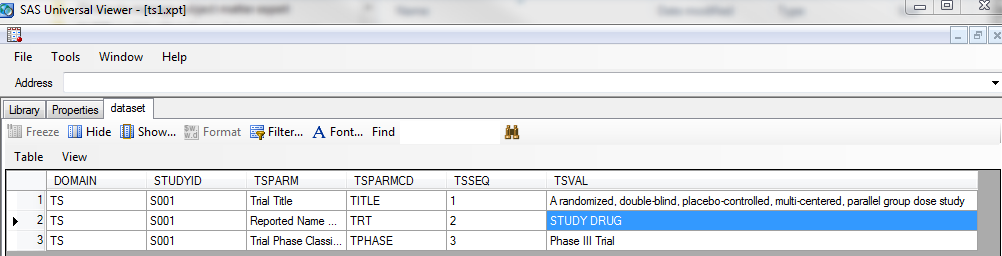

## Creating TS xpt dataset from excel spreadsheet
The process of TS xpt dataset creation from excel spreadsheet follows as:
-  Read excel spreadsheet from local drive
-  convert to dataframe in python environment
-  create TS xpt datasets into local drive

The excel spreadsheet follows as.
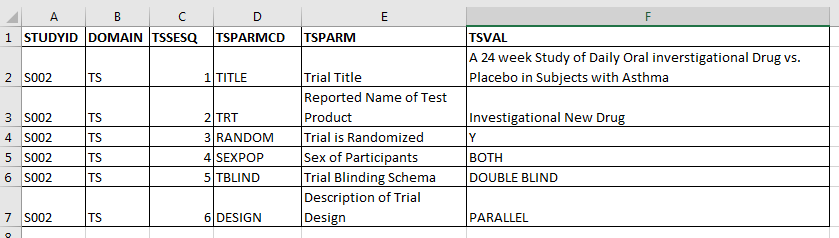

In [4]:
df_ts2 = pd.io.excel.read_excel('./data/raw/ts.xlsx', sheet_name=0)
print(type(df_ts2))
df_ts2

<class 'pandas.core.frame.DataFrame'>


,STUDYID,DOMAIN,TSSESQ,TSPARMCD,TSPARM,TSVAL
0,S002,TS,1,TITLE,Trial Title,A 24 week Study of Daily Oral inverstigational...
1,S002,TS,2,TRT,Reported Name of Test Product,Investigational New Drug
2,S002,TS,3,RANDOM,Trial is Randomized,Y
3,S002,TS,4,SEXPOP,Sex of Participants,BOTH
4,S002,TS,5,TBLIND,Trial Blinding Schema,DOUBLE BLIND
5,S002,TS,6,DESIGN,Description of Trial Design,PARALLEL


In [5]:
### Write SAS datasets from dictionary format
with open('./data/CDISC/ts2.xpt', 'wb') as f:
    xport.from_dataframe(df_ts2, f)

Final TS SAS xpt file is created in /data local drive and its content is shown in the following. 
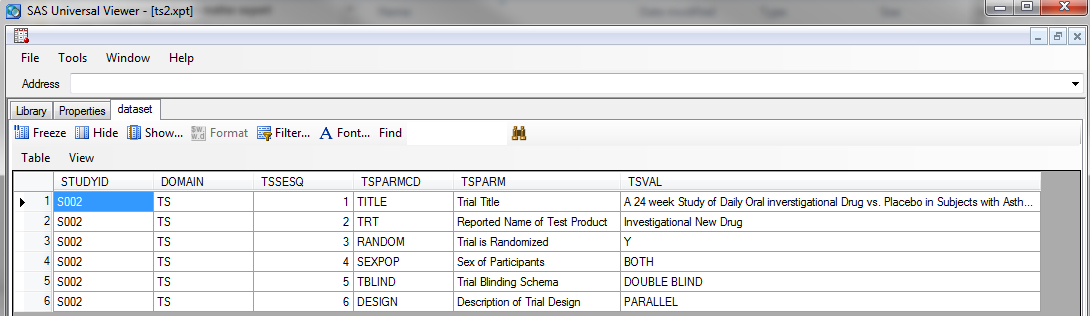